**Distribution of S. aureus FabI inhibitors across distinct biological assays (Assay ChEMBL IDs), with each color representing a specific assay used to determine the IC50 of FabI**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

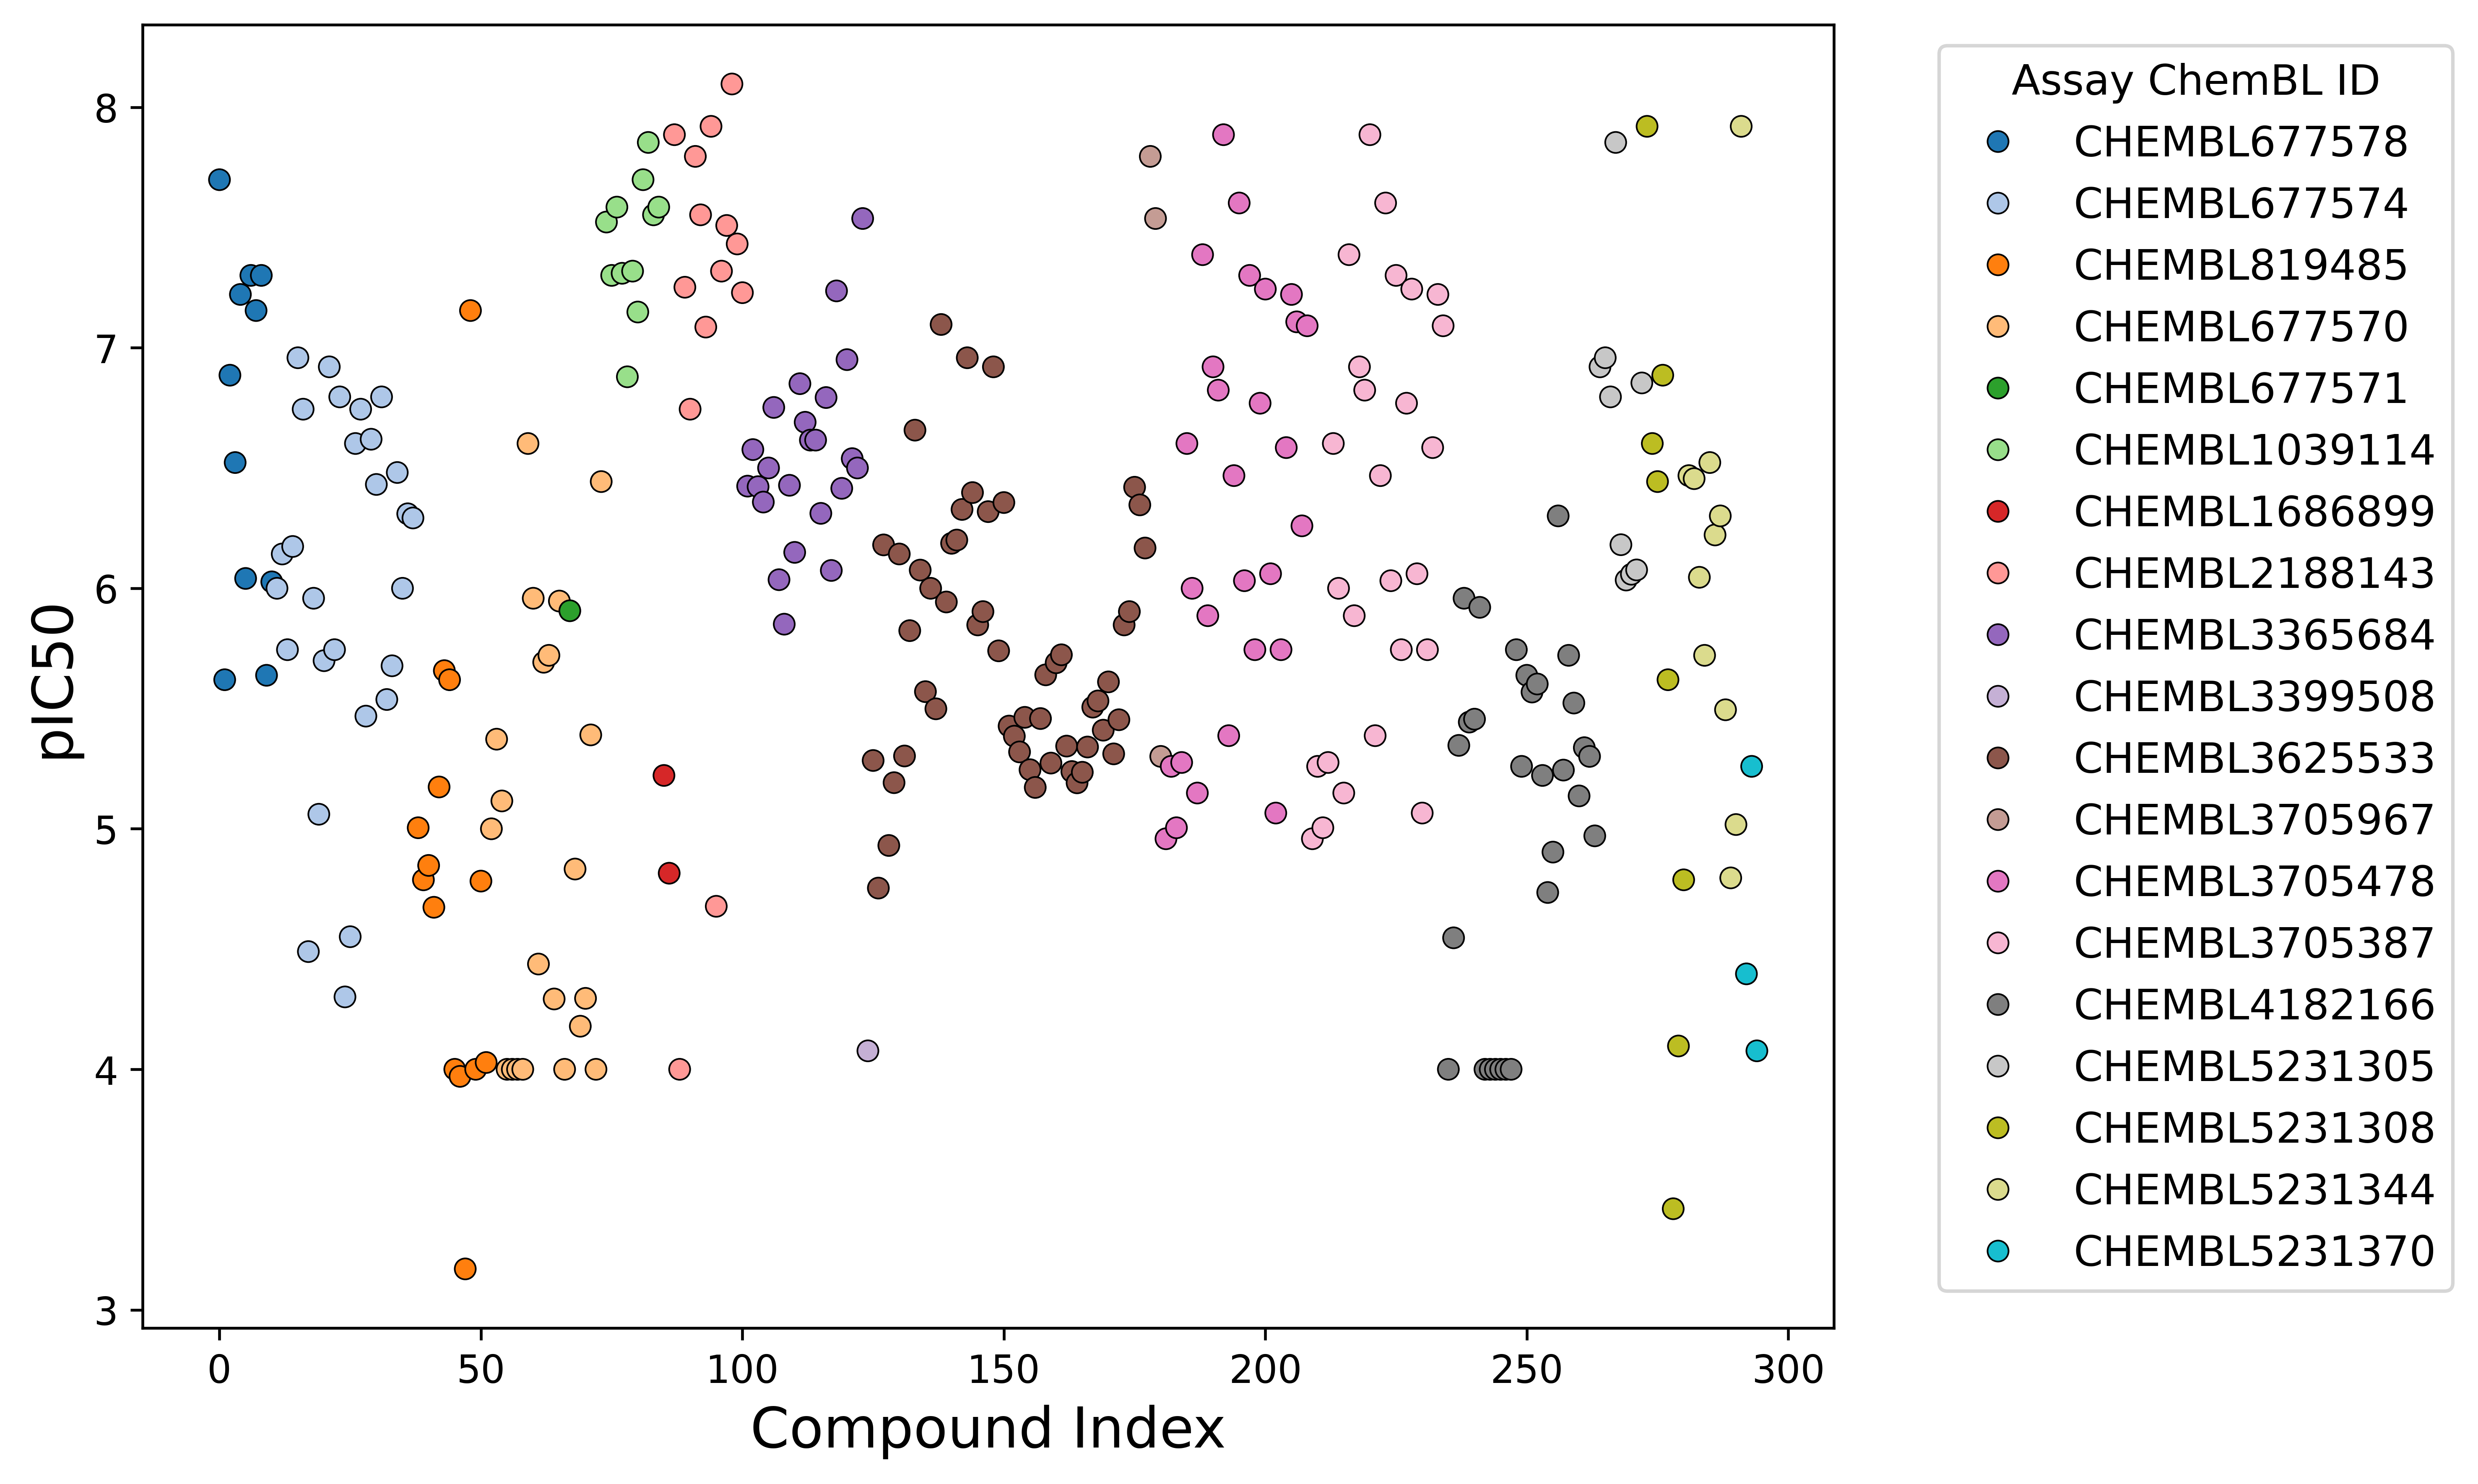

In [6]:
# Load the DataFrame from an Excel file
file_path = 'df_fabi_s_aureus_IC50_complete.xlsx'  # Change this path based on your file's location
df = pd.read_excel(file_path)

# Remove entries without a value in 'standard_value'
df = df.dropna(subset=['standard_value'])

# Convert 'standard_value' to pIC50 using a function
def convert_to_pIC50(value):
    if value > 0:
        # Convert from nM to M and then compute pIC50
        return -np.log10(value * 1e-9)  
    else:
        return np.nan

# Apply the conversion function to the 'standard_value' column
df['pIC50'] = df['standard_value'].apply(convert_to_pIC50)

# Create an index for compounds
df['Compound Index'] = range(len(df))

# Plot pIC50 values on a dot plot, coloring by 'assay_chembl_id'
plt.figure(figsize=(10, 6), dpi=600)  # Set the figure size and resolution
sns.scatterplot(data=df, x='Compound Index', y='pIC50', hue='assay_chembl_id', palette='tab20', edgecolor='black')

# Adjust the size of the title, labels, and legend
#plt.title('pIC50 Values by Compound Index', fontsize=16)
plt.xlabel('Compound Index', fontsize=16)
plt.ylabel('pIC50', fontsize=16)
plt.grid(False)  # Turn off the grid
# Increase the size of axis labels
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
# Adjust the legend size and position
plt.legend(title='Assay ChemBL ID', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

plt.tight_layout()  # Adjust layout to make room for the legend without overlap
plt.show()  # Display the plot